# **Providing data-driven suggestions for HR**
## **Pace: Plan**
#### **Understand the business scenario and problem**

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

Familiarize yourself with the HR dataset
The dataset contains 15,000 rows and 10 columns for the variables listed below.

| Variable              | Description                                                       |
|-----------------------|-------------------------------------------------------------------|
| satisfaction_level    | Employee-reported job satisfaction level [0–1]                    |
| last_evaluation       | Score of employee's last performance review [0–1]                 |
| number_project        | Number of projects employee contributes to                        |
| average_monthly_hours | Average number of hours employee worked per month                 |
| time_spend_company    | How long the employee has been with the company (years)           |
| Work_accident         | Whether or not the employee experienced an accident while at work |
| left                  | Whether or not the employee left the company                      |
| promotion_last_5years | Whether or not the employee was promoted in the last 5 years      |
| Department            | The employee's department                                         |
| salary                | The employee's salary (U.S. dollars)                              

### **Step 1. Imports**
**Import packages**

In [5]:
# Import packages
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# To build model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# Metrics and other functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Saving Model
import pickle

### **Load dataset**

In [7]:
# Load dataset into a dataframe
df0 = pd.read_csv(r'D:\5B. Google_Advanced_data_analysis\Capstone_project\HR_capstone_dataset.csv')


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### **Step 2. Data Exploration (Initial EDA and data cleaning)**

_Understand your variables

_Clean your dataset (missing data, redundant data, outliers)

**Gathering basic information about the data**

In [9]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Gathering descriptive statistics about the data**

In [11]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Rename columns**
  
As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in 'snake_case', correct any column names that are misspelled, and make column names more concise as needed.

In [13]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [14]:

# Rename columns as needed
df0.rename(columns = {"Work_accident":"work_accident",
                      "average_montly_hours":"average_monthly_hours",
                      "time_spend_company":"tenure",
                      "Department":"department"}, inplace = True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

**Check missing values**

In [16]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

**Check duplicates**
  
Check for any duplicate entries in the data.

In [18]:
# Check for duplicates
df0.duplicated().sum()

3008

In [19]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [20]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Check outliers**
  
Check for outliers in the data.

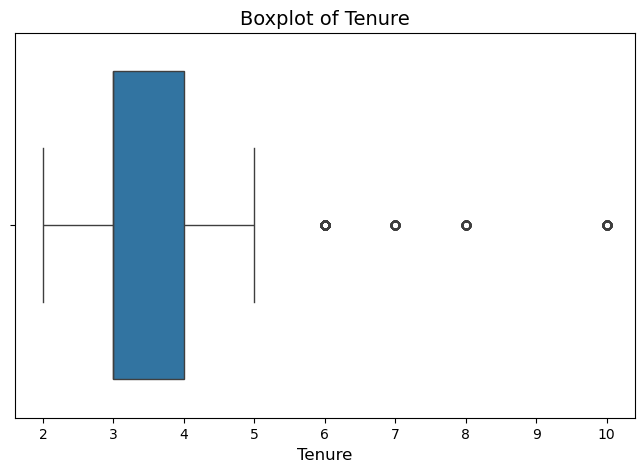

In [22]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
# Set the figure size and style
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1['tenure'])

# Title and labels
plt.title("Boxplot of Tenure", fontsize=14)
plt.xlabel("Tenure", fontsize=12)

# Show plot
plt.show()

Above boxplot shows that there are outliers in the `tenure` variable.

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

In [24]:
# Determine the number of rows containing outliers
# Step 1: Calculate Q1 and Q3
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Calculate upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Step 4: Identify outliers
outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

# Step 5: Count outliers
print("Number of employees with tenure higher than the 75th percentile':", outliers.shape[0])

Number of employees with tenure higher than the 75th percentile': 824


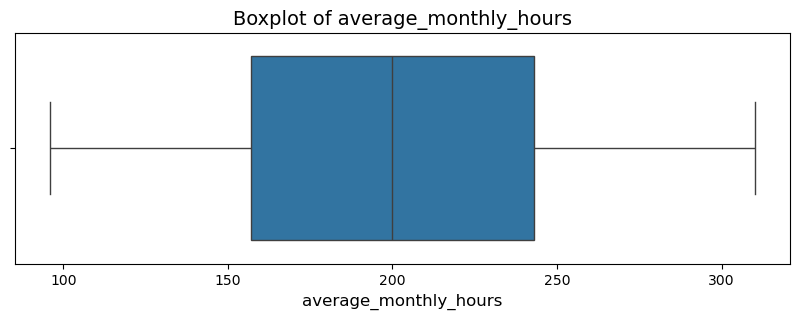

In [25]:
# Create a boxplot to visualize distribution of `average_monthly_hours` and detect any outliers
# Set the figure size and style
plt.figure(figsize=(10,3))
sns.boxplot(x=df1['average_monthly_hours'])

# Title and labels
plt.title("Boxplot of average_monthly_hours", fontsize=14)
plt.xlabel("average_monthly_hours", fontsize=12)

# Show plot
plt.show()

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## **Pace: Analyze Stage**

-Perform EDA (analyze relationships between variables)

### **Step 3. Data Exploration (Continue EDA)**

Begin by understanding how many employees left and what percentage of all employees this figure represents.

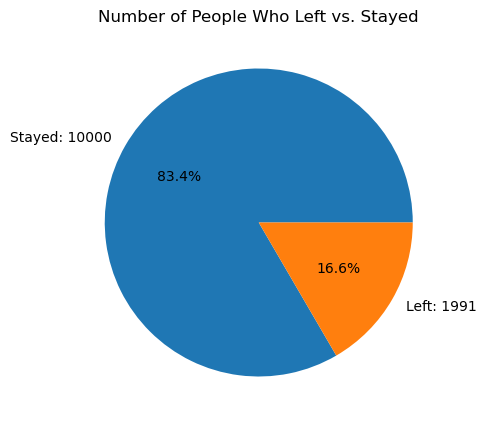

In [29]:
# Get numbers of people who left vs. stayed
fig = plt.figure(figsize=(5, 5))
data = df1['left'].value_counts()

# Plotting the pie chart
plt.pie(data,
        labels=[f'Stayed: {data.values[0]}', f'Left: {data.values[1]}'],
        autopct='%1.1f%%')
plt.title('Number of People Who Left vs. Stayed')
plt.show()

**Data visualizations**

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

You could start by creating a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, you could also plot a stacked histogram to visualize the distribution of `number_project` for those who stayed and those who left.

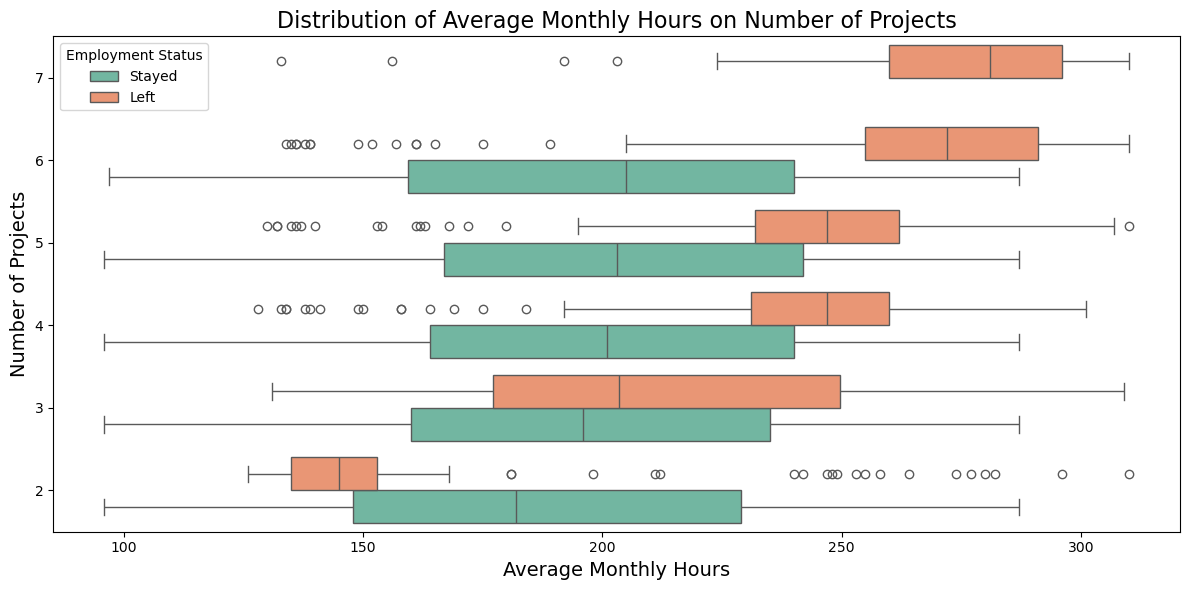

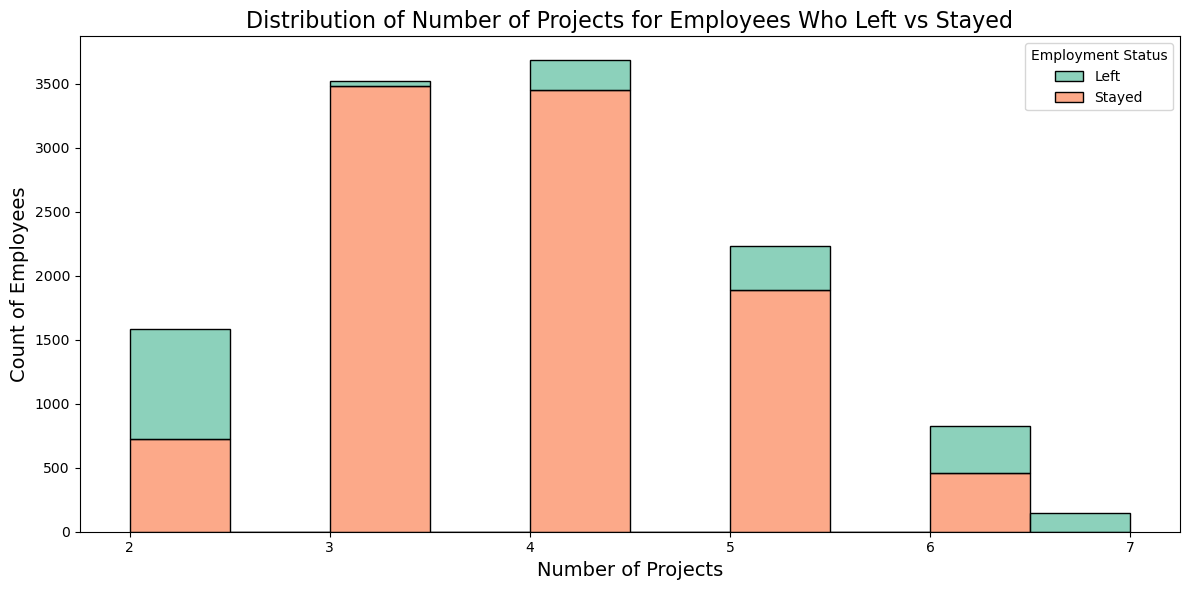

In [31]:
# Create a plot as needed

# Boxplot: Average Monthly Hours on Number of Projects
plt.figure(figsize=(12, 6))
box = sns.boxplot(
    x='average_monthly_hours',
    y='number_project',
    hue='left',
    orient="h",
    data=df1,
    palette="Set2"
)

# Invert y-axis
plt.gca().invert_yaxis()

# Update legend labels
handles, labels = box.get_legend_handles_labels()
box.legend(handles=handles, labels=['Stayed', 'Left'], title='Employment Status')

# Add labels and title
plt.title('Distribution of Average Monthly Hours on Number of Projects', fontsize=16)
plt.xlabel('Average Monthly Hours', fontsize=14)
plt.ylabel('Number of Projects', fontsize=14)

plt.tight_layout()
plt.show()

# # Histogram for Number of Projects for Employees Who Left vs Stayed
df2 = df1.copy()
df2['Employment Status'] = df2['left'].map({0: 'Stayed', 1: 'Left'})

# Plot histogram with labeled hue
plt.figure(figsize=(12, 6))
sns.histplot(data=df2, x="number_project", hue="Employment Status", multiple="stack", palette="Set2", bins=10)

# Title and axes labels
plt.title('Distribution of Number of Projects for Employees Who Left vs Stayed', fontsize=16)
plt.xlabel('Number of Projects', fontsize=14)
plt.ylabel('Count of Employees', fontsize=14)

plt.tight_layout()
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/week—much more than any other group.

3. The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.

In [33]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

This confirms that all employees with 7 projects did leave.

Next, you could examine the `average monthly hours` versus the `satisfaction levels`.

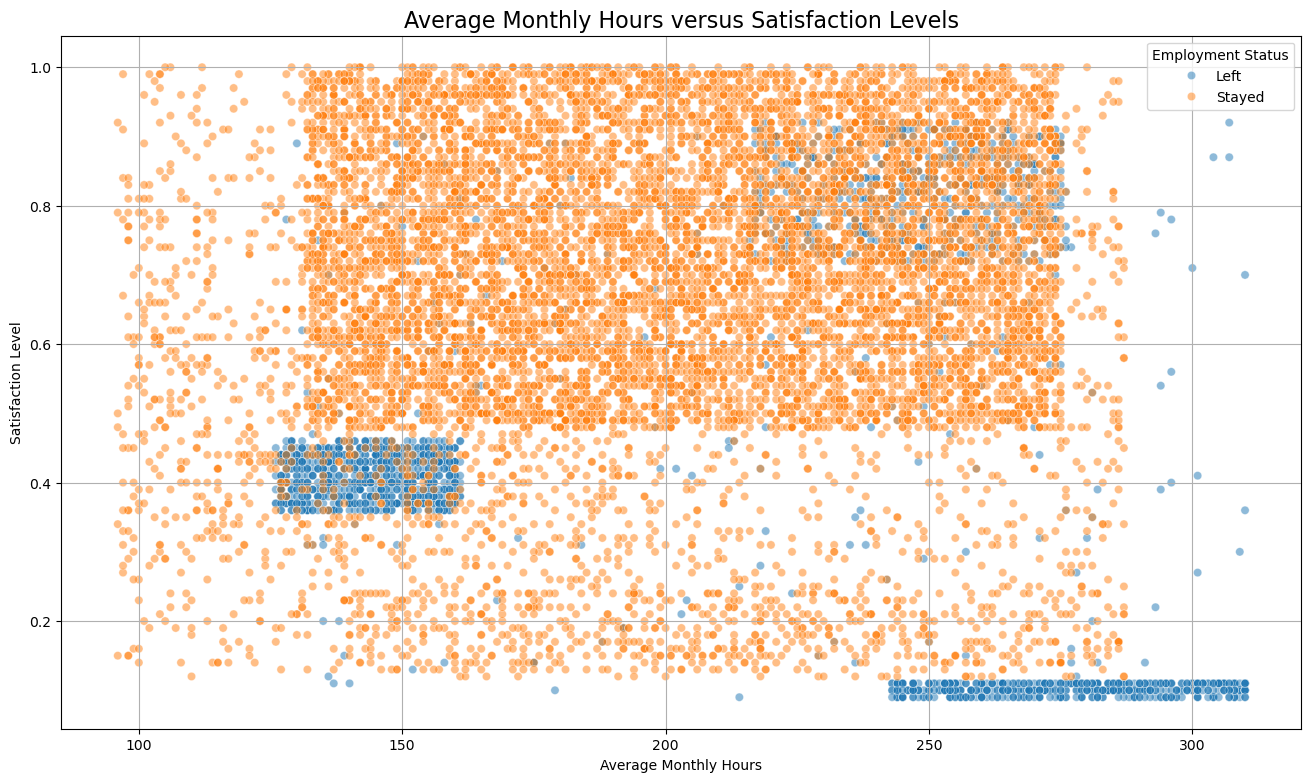

In [35]:
# Create a plot as needed 
# Copy the DataFrame and map employment status before plotting
df2 = df1.copy()
df2['Employment Status'] = df2['left'].map({0: 'Stayed', 1: 'Left'})  # 0 = Stayed, 1 = Left

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(
    data=df2,
    x='average_monthly_hours',
    y='satisfaction_level',
    hue='Employment Status',
    alpha=0.5
)

plt.title('Average Monthly Hours versus Satisfaction Levels', fontsize=16)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.grid(True)
plt.legend(title='Employment Status')
plt.show()

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

For the next visualization, it might be interesting to visualize `satisfaction levels by tenure`.

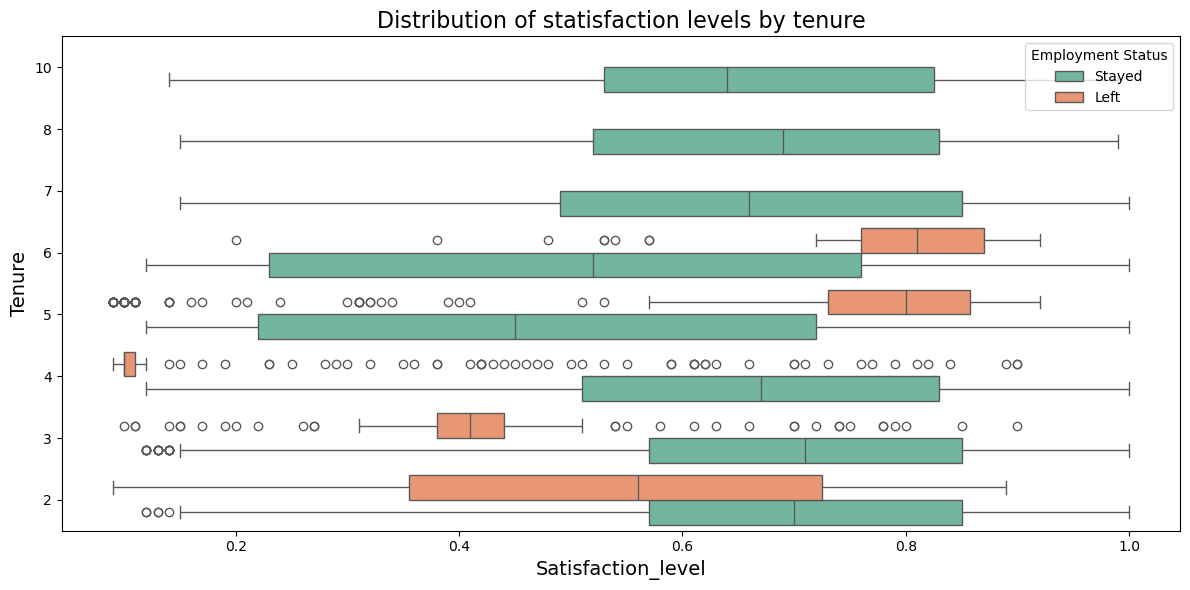

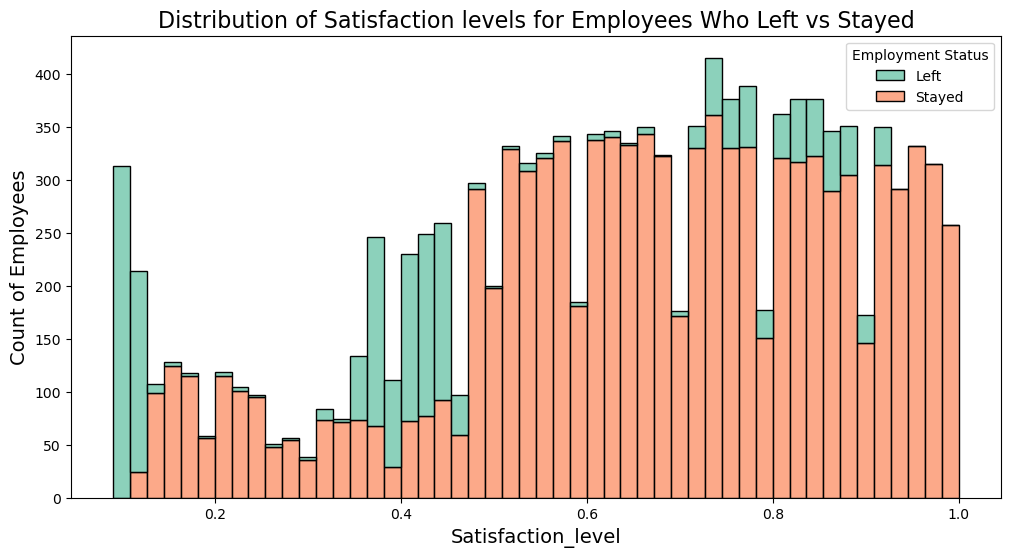

In [37]:
# Create a plot as needed

# Boxplot: Satisfaction levels by tenure
plt.figure(figsize=(12, 6))
box = sns.boxplot(
    x='satisfaction_level',
    y='tenure',
    hue='left',
    orient="h",
    data=df1,
    palette="Set2"
)

# Invert y-axis
plt.gca().invert_yaxis()

# Update legend labels
handles, labels = box.get_legend_handles_labels()
box.legend(handles=handles, labels=['Stayed', 'Left'], title='Employment Status')

# Add labels and title
plt.title('Distribution of statisfaction levels by tenure', fontsize=16)
plt.xlabel('Satisfaction_level', fontsize=14)
plt.ylabel('Tenure', fontsize=14)

plt.tight_layout()
plt.show()

# Histogram of satisfaction levels for Employees Who Left vs Stayed
df2 = df1.copy()
df2['Employment Status'] = df2['left'].map({0: 'Stayed', 1: 'Left'})

# Plot histogram with labeled hue
plt.figure(figsize=(12, 6))
sns.histplot(data=df2, x="satisfaction_level", hue="Employment Status", multiple="stack", palette="Set2", bins=50)

# Title and axes labels
plt.title('Distribution of Satisfaction levels for Employees Who Left vs Stayed', fontsize=16)
plt.xlabel('Satisfaction_level', fontsize=14)
plt.ylabel('Count of Employees', fontsize=14)

plt.show()

1. Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

2. Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.

3. The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.

4. The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [39]:
# Calculate mean and median satisfaction scores for employees who stayed vs left
mean_median_scores = df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])

# Display the result
print(mean_median_scores)

          mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41


- As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score.
  
Next, you could examine salary levels for different tenures.

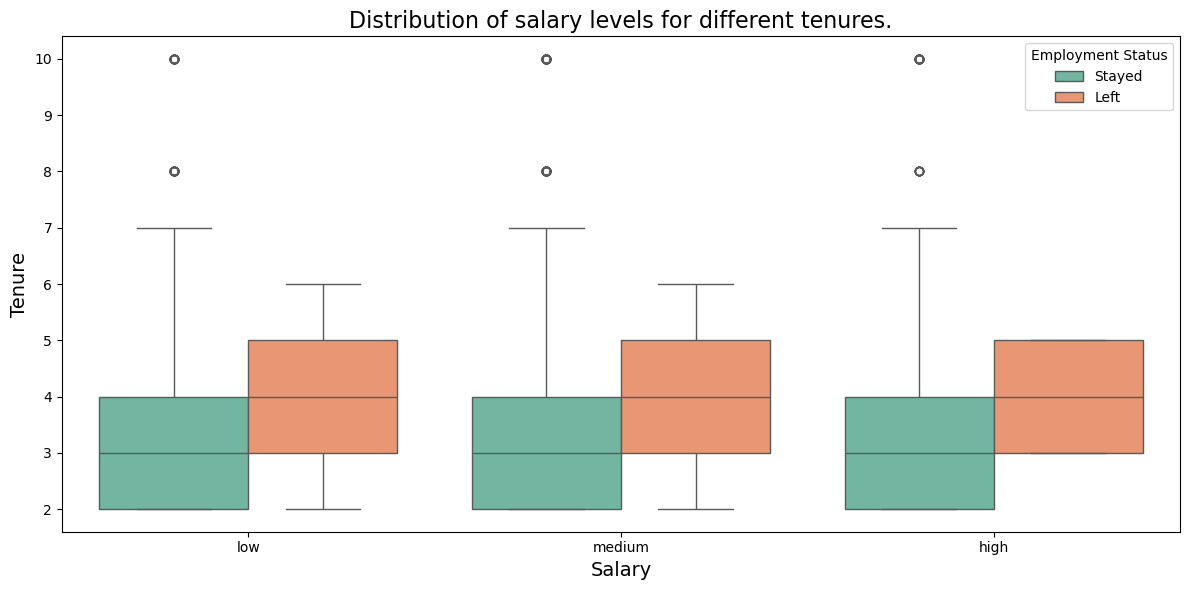

In [41]:
# Create a plot as needed

# Boxplot: Salary levels for different tenures.
plt.figure(figsize=(12, 6))
box = sns.boxplot(
    x='salary',
    y='tenure',
    hue='left',
    data=df1,
    palette="Set2"
)
# Update legend labels
handles, labels = box.get_legend_handles_labels()
box.legend(handles=handles, labels=['Stayed', 'Left'], title='Employment Status')

# Add labels and title
plt.title('Distribution of salary levels for different tenures.', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Tenure', fontsize=14)

plt.tight_layout()
plt.show()

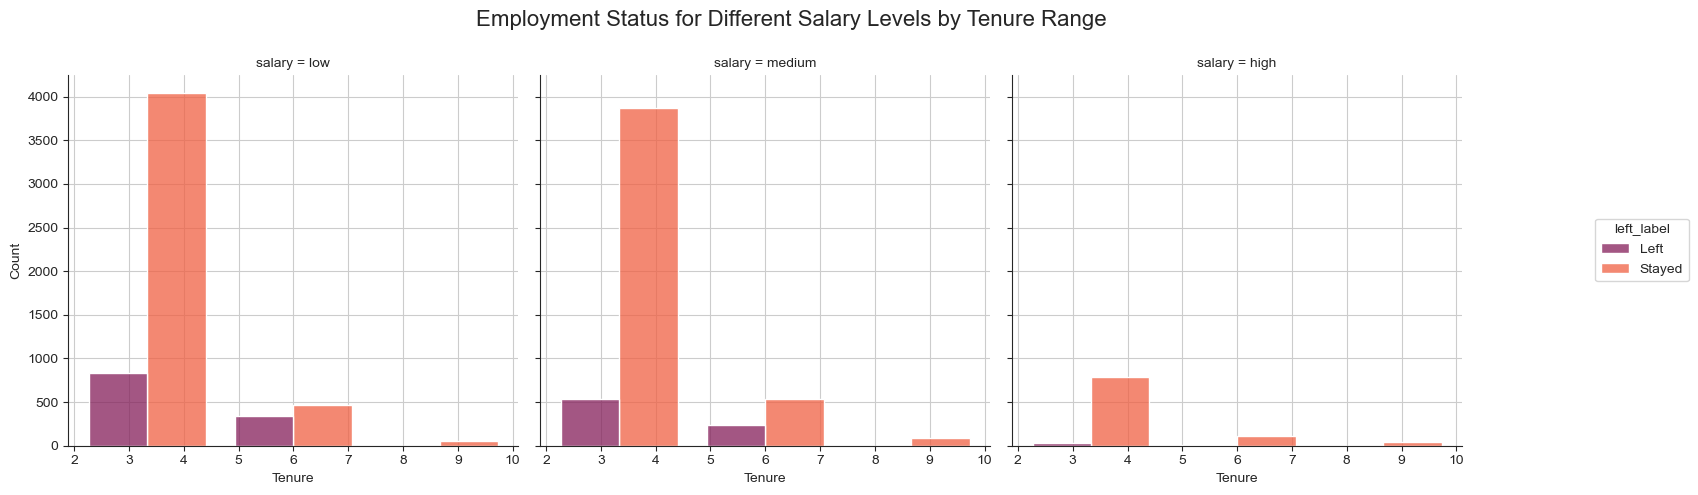

In [42]:

#Histogram of Employment Status for Different Salary Levels by Tenure Range

# Ensure 'left_label' and 'salary_code' are defined
df2 = df1.copy()
df2['left_label'] = df2['left'].map({0: 'Stayed', 1: 'Left'})

# Set gridlines
sns.set_style("ticks", {'axes.grid': True})

# Create histogram
figure = sns.displot(
    data=df2,
    x='tenure',
    hue='left_label',
    col='salary',
    multiple='dodge',
    shrink=0.8,
    palette="rocket",
    bins=3,
    legend=True,
)

# Move legend
sns.move_legend(figure, "center left", bbox_to_anchor=(1, 0.5), frameon=True)

# Set title and axis labels
figure.set_axis_labels("Tenure", "Count")
figure.fig.subplots_adjust(top=0.85)
figure.fig.suptitle("Employment Status for Different Salary Levels by Tenure Range", size=16)

# Set y-axis limit
for ax in figure.axes.flat:
    ax.set_ylim(0, None)

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

Next, you could explore whether there's a `correlation` between working long hours and receiving high evaluation scores. You could create a `scatterplot of average_monthly_hours versus last_evaluation`.

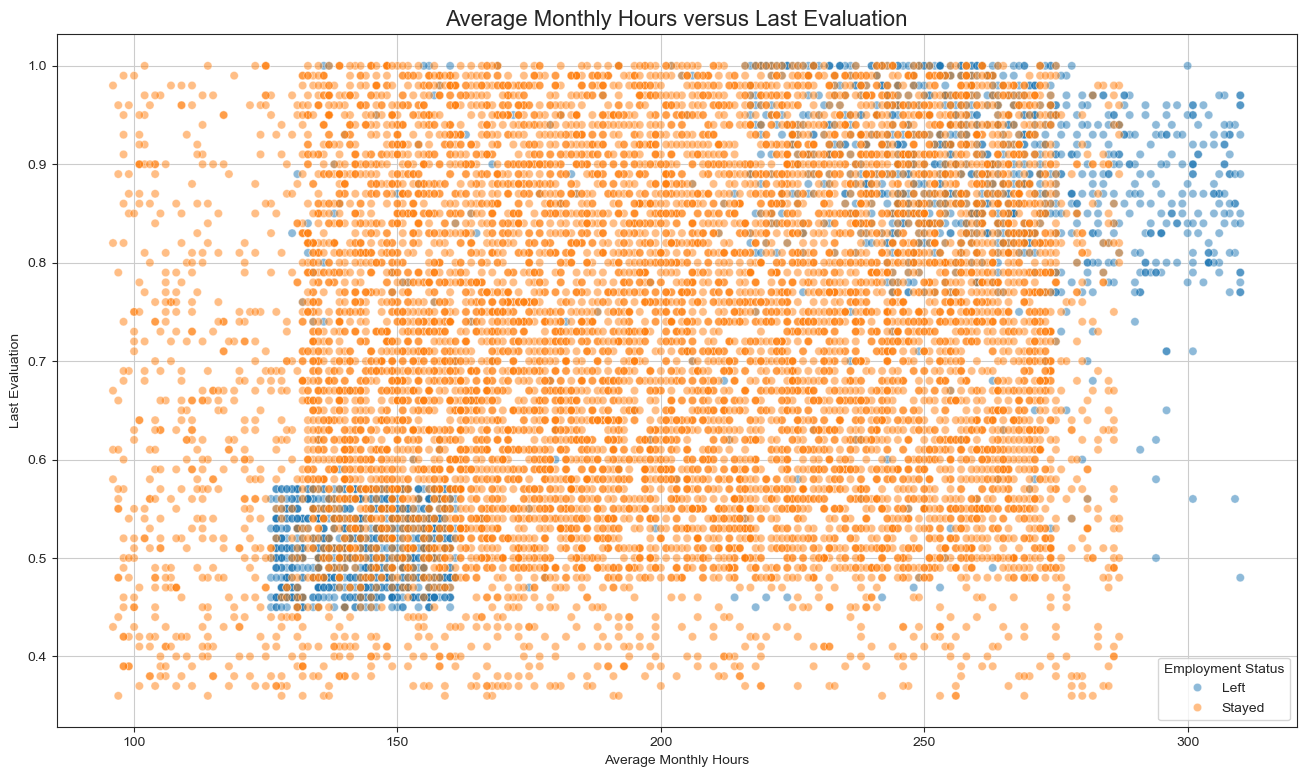

In [44]:
# Create a plot as needed 
# Copy the DataFrame and map employment status before plotting
df2 = df1.copy()
df2['Employment Status'] = df2['left'].map({0: 'Stayed', 1: 'Left'})  # 0 = Stayed, 1 = Left

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(
    data=df2,
    x='average_monthly_hours',
    y='last_evaluation',
    hue='Employment Status',
    alpha=0.5
)

plt.title('Average Monthly Hours versus Last Evaluation', fontsize=16)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation')
plt.grid(True)
plt.legend(title='Employment Status')
plt.show()

The following observations can be made from the scatterplot above:

-The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of `166.67` hours with lower evaluation scores.

-There seems to be a correlation between hours worked and evaluation score.

-There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.

-Most of the employees in this company work well over 167 hours per month.

Next, you could examine whether employees who worked `very long hours` were `promoted in the last five years`.

In [46]:
# Count how many employees exceed the standard threshold
overworked_count = (df1['average_monthly_hours'] > 166.67).sum()
total_count = df1.shape[0]
overworked_percentage = overworked_count / total_count * 100

print(f"{overworked_count} out of {total_count} employees ({overworked_percentage:.2f}%) are working more than 166.67 hours per month.")

8278 out of 11991 employees (69.04%) are working more than 166.67 hours per month.


In [47]:
#Contingency Table
# Flag overworked employees
df1['overworked'] = df1['average_monthly_hours'] > 166.67

# Create a cross-tabulation
promotion_table = pd.crosstab(df1['overworked'], df1['promotion_last_5years'], 
                               rownames=['Overworked'], colnames=['Promoted in Last 5 Years'])

print(promotion_table)

Promoted in Last 5 Years     0    1
Overworked                         
False                     3648   65
True                      8140  138


C:\Users\mauth\AppData\Local\Temp\ipykernel_17888\2540355059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['overworked'] = df1['average_monthly_hours'] > 166.67


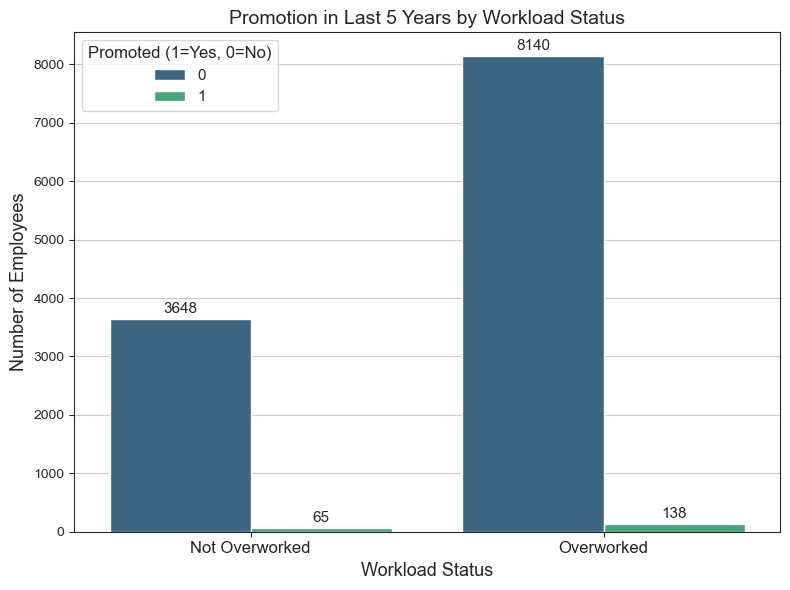

In [48]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df1,
    x='overworked',
    hue='promotion_last_5years',
    palette='viridis'
)

# Add custom x-axis labels
plt.xticks([0, 1], ['Not Overworked', 'Overworked'], fontsize=12)
plt.xlabel('Workload Status', fontsize=13)
plt.ylabel('Number of Employees', fontsize=13)
plt.title('Promotion in Last 5 Years by Workload Status', fontsize=14)
plt.legend(title='Promoted (1=Yes, 0=No)', fontsize=11, title_fontsize=12)

# Add count labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=11, padding=2)

plt.tight_layout()
plt.show()

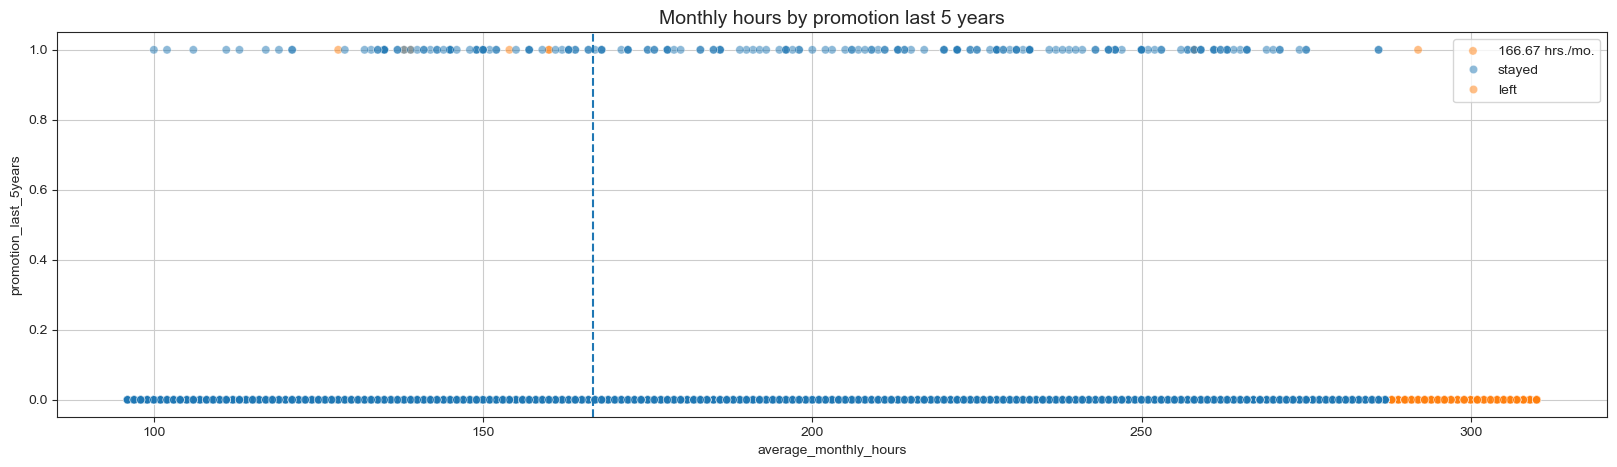

In [49]:
# Create the plot
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(20,5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5)
plt.axvline(x=166.67, ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');


The plot above shows the following:

-Very few employees who were promoted in the last five years left

-Very few employees who worked the most hours were promoted

-All of the employees who left were working the longest hours

Next, you could inspect how the employees who `left` are distributed across `departments`.

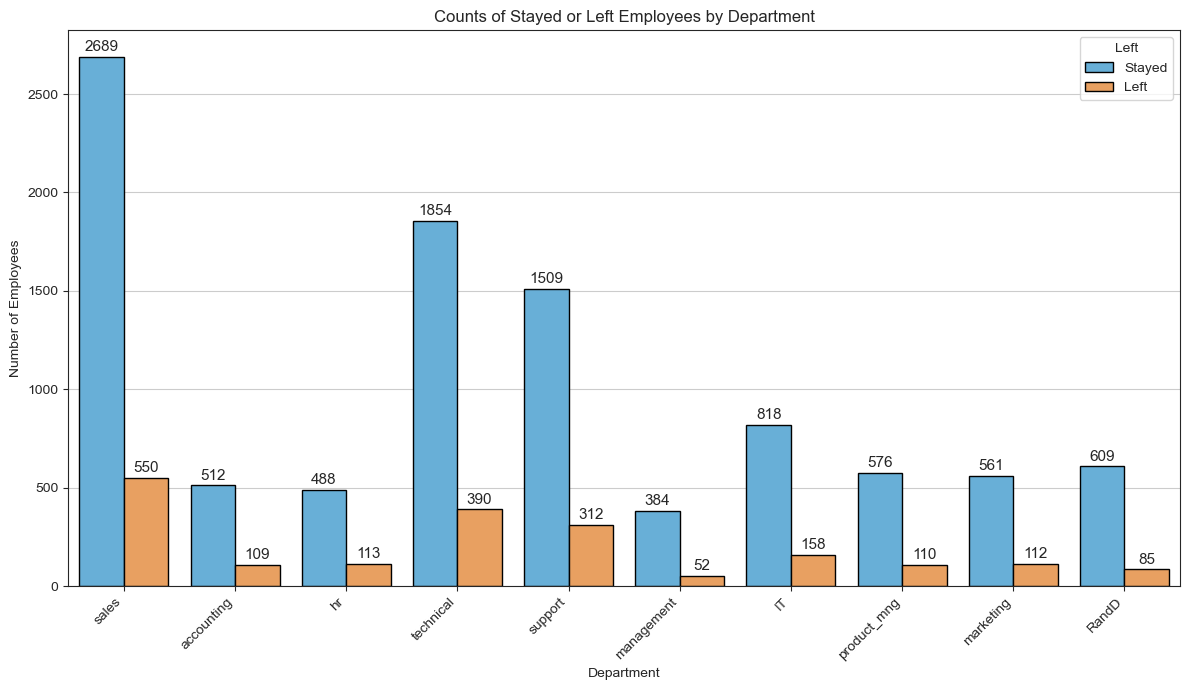

In [51]:
# Create the grouped bar chart
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df1, x='department', hue='left', palette=['#56B4E9', '#FF9F4A'], edgecolor='black')
plt.title('Counts of Stayed or Left Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Left', labels=['Stayed', 'Left'])

# Add count labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=11, padding=2)

plt.tight_layout()
plt.show()

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

Lastly, you could check for strong correlations between variables in the data.

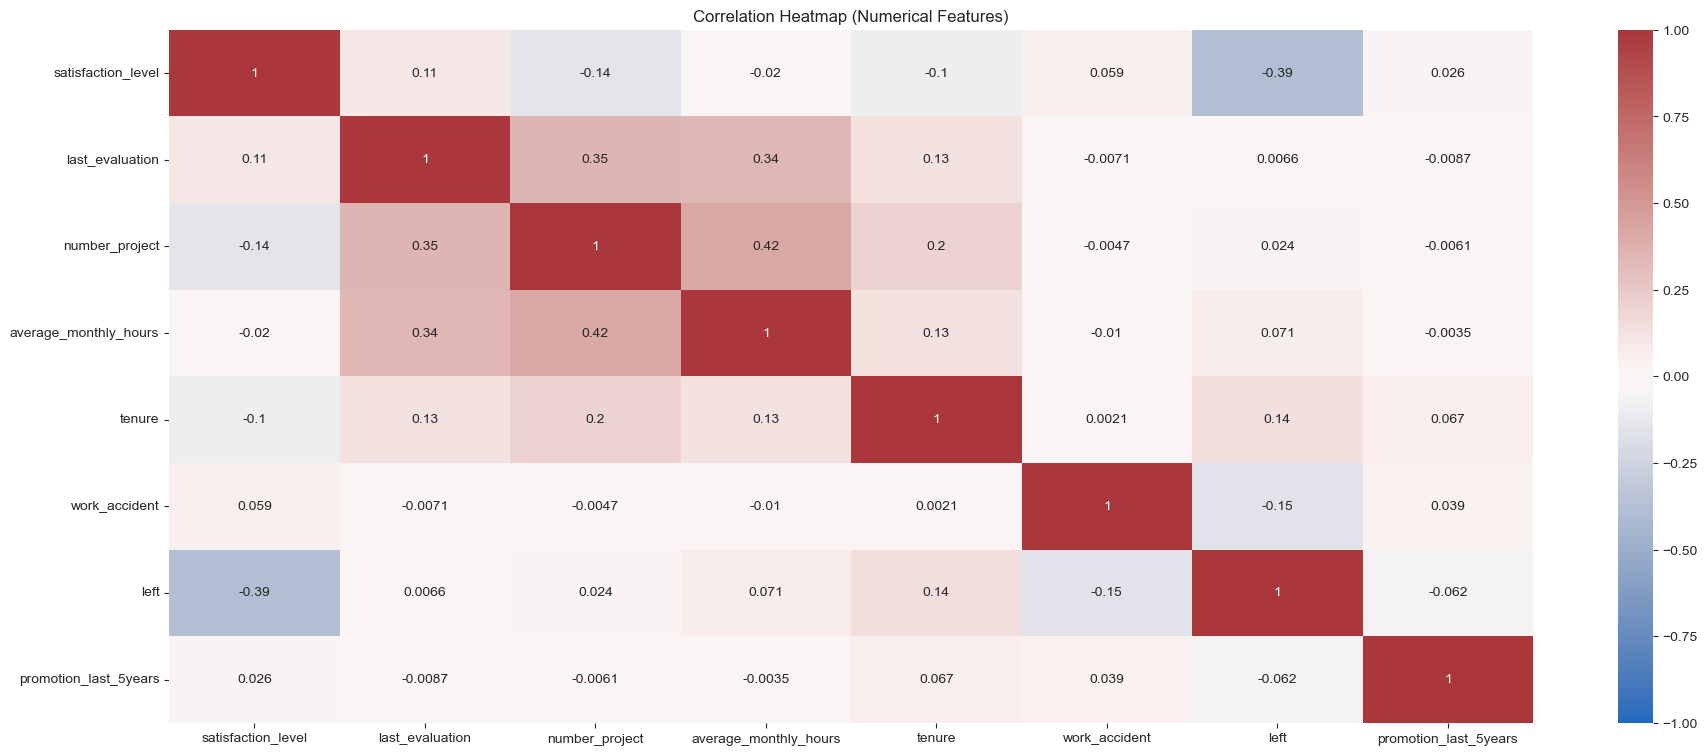

In [53]:
# Create a plot as needed 
# Assuming df1 is your DataFrame
numerical_df = df0.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numerical data
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(22, 9))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

Alright, let's zoom in on the 'left' column in this correlation heatmap. Here's what the `correlation coefficients` tell us about the relationship between 'left' (whether an employee left the company) and the other numerical features:

`satisfaction_level`: The correlation is -0.39. This indicates a **moderate negative correlation**. As we noted before, lower satisfaction levels are associated with a higher likelihood of an employee leaving.

`last_evaluation`: The correlation is 0.0066. This is a **very weak** positive correlation, essentially close to zero. There's practically no linear relationship between an employee's last evaluation score and whether they left the company.

`number_project`: The correlation is 0.024. This is also a **very weak** positive correlation. The number of projects an employee was involved in doesn't seem to have a significant linear impact on their decision to leave.

`average_monthly_hours`: The correlation is 0.071. This shows a **weak positive** correlation. Employees who worked slightly more hours on average had a slightly higher tendency to leave, but the relationship isn't strong.

`tenure`: The correlation is 0.14. This suggests a **weak** positive correlation. Employees with longer tenure had a slightly higher tendency to leave, although this relationship isn't very strong.

`work_accident`: The correlation is -0.15. This indicates a **weak negative** correlation. Employees who experienced a work accident are slightly less likely to leave.

`promotion_last_5years`: The correlation is -0.062. This shows a **weak negative** correlation. Employees who received a promotion in the last five years were slightly less likely to leave.

*In summary, by focusing on the 'left' column:*

The strongest predictor among these numerical features for an employee leaving the company is their **`satisfaction_level`**. Lower satisfaction is noticeably linked to a higher chance of leaving. The other numerical features show only weak correlations with the 'left' variable, suggesting they don't have a strong direct linear relationship with employee turnover.

## **PACE: Construct Stage**

-Determine which models are most appropriate

-Construct the model

-Confirm model assumptions

-Evaluate model results to determine how well your model fits the data

**Recall model assumptions**

**Logistic Regression model assumptions**

-Outcome variable is categorical

-Observations are independent of each other

-No severe multicollinearity among X variables

-No extreme outliers

-Linear relationship between each X variable and the logit of the outcome variable

-Sufficiently large sample size

## **Step 3. Model Building**

-Fit a model that predicts the outcome variable using two or more independent variables

-Check model assumptions

-Evaluate the model

**Identify the type of prediction task.**

Your goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

**Identify the types of models most appropriate for this task.**

Since the variable you want to predict (whether an employee leaves the company) is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.

So you could proceed with one of the two following approaches. Or, if you'd like, you could implement both and determine how they compare.

#### **Modeling Approach A: Logistic Regression**

**1. Data Preparation**

Encode categorical variables:

-`Salary` is ordinal → convert to numbers: low=0, medium=1, high=2

-`Department` is nominal → apply one-hot encoding

Remove `outliers` in `tenure` column

In [59]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,True,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,True,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,True,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,False,True,False,False


Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [61]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,True,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,True,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,False,True,False,False


Now, check the class balance of the dependent (target) variable, `left`

In [63]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [64]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [65]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,True,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,True,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,False,True,False,False


In [66]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [67]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [68]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

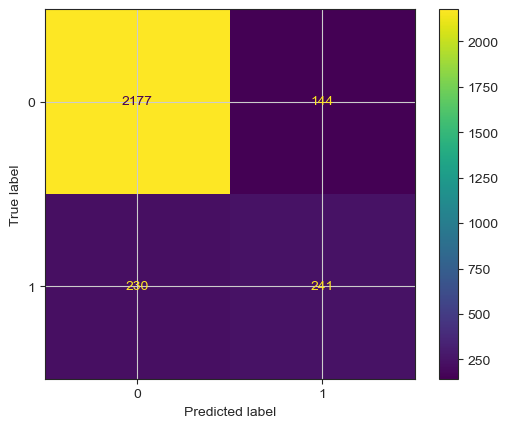

In [70]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

Top-Left Cell (2177): This represents the True Positives for class '0' ("Stayed"). It means that there were 2177 employees who actually stayed, and our model correctly predicted that they would stay.

Top-Right Cell (144): This represents the False Positives for class '1' ("Left"). It means that there were 144 employees who actually stayed (true label '0'), but our model incorrectly predicted that they would leave (predicted label '1'). These are also known as Type I errors.

Bottom-Left Cell (230): This represents the False Negatives for class '1' ("Left"). It means that there were 230 employees who actually left (true label '1'), but our model incorrectly predicted that they would stay (predicted label '0'). These are also known as Type II errors.

Bottom-Right Cell (241): This represents the True Positives for class '1' ("Left"). It means that there were 241 employees who actually left, and our model correctly predicted that they would leave.

In [72]:
#Classification Report
print(" Linear regression classification report ")
print(classification_report(y_test, y_pred, target_names=['Stayed', 'Left']))

 Linear regression classification report 
              precision    recall  f1-score   support

      Stayed       0.90      0.94      0.92      2321
        Left       0.63      0.51      0.56       471

    accuracy                           0.87      2792
   macro avg       0.77      0.72      0.74      2792
weighted avg       0.86      0.87      0.86      2792



For the "Stayed" Class (Negative Class):

Precision: 0.91 - Out of all the employees the model predicted would "Stayed", **91% of them actually did stay**. This indicates a low rate of false positives (incorrectly predicting someone would stay when they actually left).
Recall: 0.94 - Out of all the employees who actually "Stayed", **the model correctly identified 94% of them**. This indicates a low rate of false negatives (incorrectly predicting someone would leave when they actually stayed).
F1-score: 0.92 - This is the harmonic mean of precision and recall. It provides a balanced measure of the model's accuracy for the "Stayed" class. A high F1-score indicates **good performance**.

For the "Left" Class (Positive Class):

Precision: 0.63 - Out of all the employees the model predicted would "Left", **only 63% of them actually left**. This indicates a higher rate of false positives (incorrectly predicting someone would leave when they actually stayed) compared to the "Stayed" class.
Recall: 0.52 - Out of all the employees who actually "Left", **the model correctly identified only 52% of them**. This indicates a higher rate of false negatives (incorrectly predicting someone would stay when they actually left) compared to the "Stayed" class.
F1-score: 0.57 - The F1-score for the "Left" class is lower than for the "Stayed" class, suggesting that **the model struggles more with accurately predicting** which employees will leave.

=> The model performs **well in predicting employees who will "Stayed"**, as indicated by the high precision, recall, and F1-score for that class. However, it is **less effective at predicting employees who will "Left"**.

In [75]:
# Get the feature names from the model (ensures alignment)
feature_names = log_clf.feature_names_in_

# Get the coefficients from the trained model
coefficients = log_clf.coef_[0]

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Check lengths to be safe (optional debug step)
print("Length of feature_names:", len(feature_names))
print("Length of coefficients:", len(coefficients))
print("Length of odds_ratios:", len(odds_ratios))

# Create a DataFrame with feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
}).sort_values(by='Odds Ratio', ascending=False)

# Display
print(feature_importance)

Length of feature_names: 19
Length of coefficients: 19
Length of odds_ratios: 19
                   Feature  Coefficient  Odds Ratio
4                   tenure     1.236564    3.443759
1          last_evaluation     0.263539    1.301527
18    department_technical     0.150727    1.162679
17      department_support     0.118289    1.125569
12           department_hr     0.105440    1.111199
16        department_sales     0.094738    1.099371
3    average_monthly_hours     0.035670    1.036314
13   department_management     0.007144    1.007169
14    department_marketing    -0.041740    0.959119
15  department_product_mng    -0.046631    0.954440
9            department_IT    -0.061158    0.940675
10        department_RandD    -0.226340    0.797447
11   department_accounting    -0.271528    0.762214
2           number_project    -0.483249    0.616776
7                   salary    -0.485558    0.615354
5            work_accident    -1.597496    0.202403
6    promotion_last_5years    -1.62

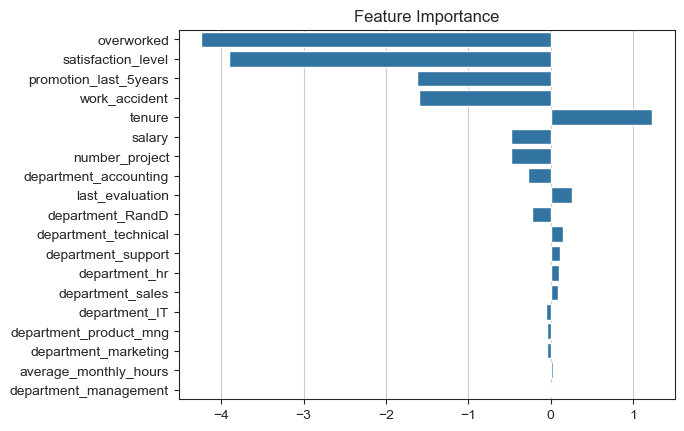

In [76]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, log_clf.coef_[0]))

# Sort the list by coefficient value (absolute magnitude)
feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Plot feature importances using seaborn
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')

# Add a title
plt.title('Feature Importance')

# Display the plot
plt.show()

#### **Modeling Approach B: Tree-based Models**

**Model Building (Tree-Based Models)**

In [78]:
# Copy the dataframe
df_dos = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_dos['salary'] = (
    df_dos['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_tree = df_dos[(df_dos['tenure'] >= lower_limit) & (df_dos['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_tree.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.38,0.53,2,157,3,0,1,0,sales,0,False
2,0.11,0.88,7,272,4,0,1,0,sales,1,True
3,0.72,0.87,5,223,5,0,1,0,sales,0,True
4,0.37,0.52,2,159,3,0,1,0,sales,0,False
5,0.41,0.50,2,153,3,0,1,0,sales,0,False


In [79]:
print("Class balance of 'left':")
print(df_tree['left'].value_counts(normalize=True))

Class balance of 'left':
left
0    0.831468
1    0.168532
Name: proportion, dtype: float64


In [80]:
# Select the features you want to use in your model
X = df_tree.drop('left', axis=1)
y = df_tree['left']

In [81]:
# 1. Define numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 2. Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 3. Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 4. Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Decision Tree Classifier**

In [83]:
# Decision Tree Classifier Pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the model pipeline
dt_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_dt = dt_pipeline.predict(X_test)
print("Decision Tree classification report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1846
           1       0.88      0.93      0.90       388

    accuracy                           0.97      2234
   macro avg       0.93      0.95      0.94      2234
weighted avg       0.97      0.97      0.97      2234



The model performs slightly better on the majority class ("Stayed") as expected, but the performance on the minority class ("Left") is also quite strong.

The high recall for the "Left" class (0.93) is particularly good, as it indicates that the model is effectively identifying most of the employees who actually leave, which is often a key goal in employee turnover prediction.

The precision for the "Left" class (0.88) is also respectable, meaning that when the model flags an employee as likely to leave, it is correct a large majority of the time.

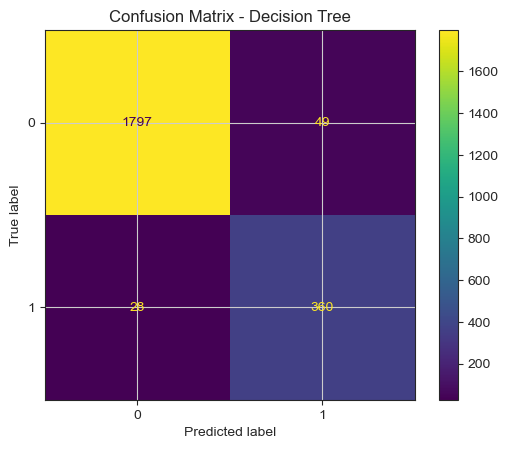

In [85]:
# Confusion Matrix Plot
ConfusionMatrixDisplay.from_estimator(dt_pipeline, X_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

**Plot Feature Importance**

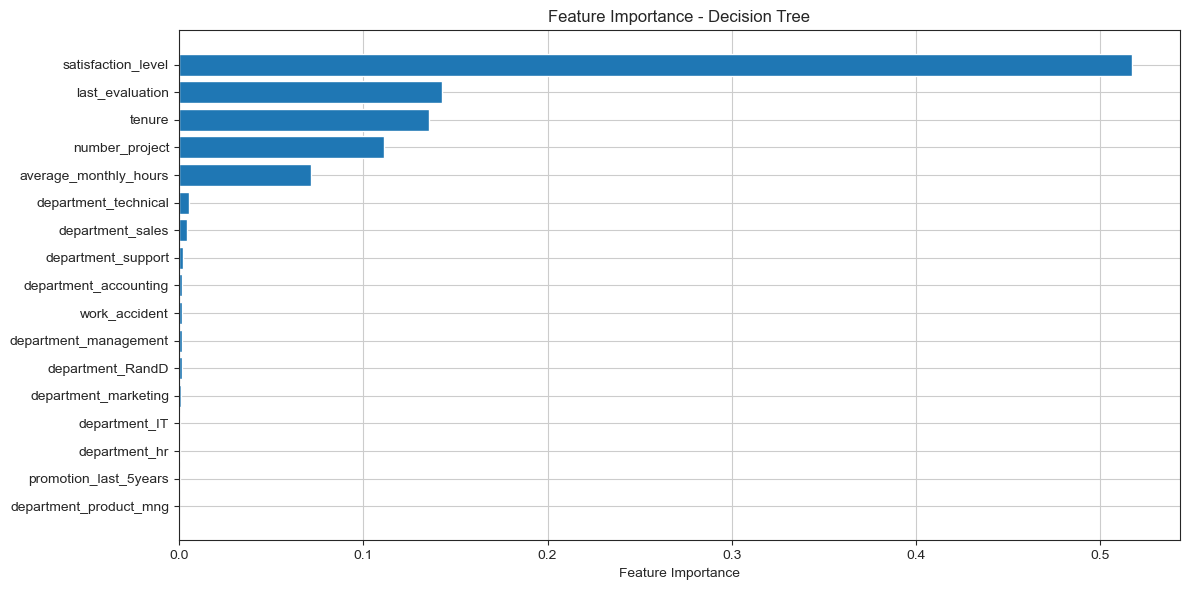

In [87]:
# 5. Extract the fitted OneHotEncoder from the pipeline
ohe = dt_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

# 6. Get feature names from the OneHotEncoder
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# 7. Combine numeric and categorical feature names
feature_names = list(numeric_features) + list(ohe_feature_names)

# 8. Get feature importances from the trained decision tree
importances = dt_pipeline.named_steps['classifier'].feature_importances_

# 9. Sort features by importance
indices = np.argsort(importances)[::-1]  # descending order
sorted_feature_names = np.array(feature_names)[indices]
sorted_importances = importances[indices]

# 10. Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Decision Tree")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

#### **Random Forest Classifier**

In [89]:
# Create a pipeline for Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
print("Random Forest classification report: ")
print(classification_report(y_test, y_pred_rf))

Random Forest classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1846
           1       0.98      0.93      0.95       388

    accuracy                           0.98      2234
   macro avg       0.98      0.96      0.97      2234
weighted avg       0.98      0.98      0.98      2234



For Class 0 (likely "Stayed"):

Precision: 0.98 - When the Random Forest model predicts an employee will "Stayed", it is correct 98% of the time. This is excellent, indicating very few false positives.

Recall: 1.00 - The model correctly identifies 100% of all the employees who actually "Stayed". This means there are no false negatives for this class – the model didn't miss any employee who stayed.

F1-score: 0.99 - This near-perfect F1-score reflects the outstanding precision and recall for the "Stayed" class.

Support: 1846 - There were 1846 actual "Stayed" employees in the test set.

For Class 1 (likely "Left"):

Precision: 0.98 - When the Random Forest model predicts an employee will "Left", it is correct 98% of the time. 

Support: 388 - There were 388 actual "Left" employees in the test set.

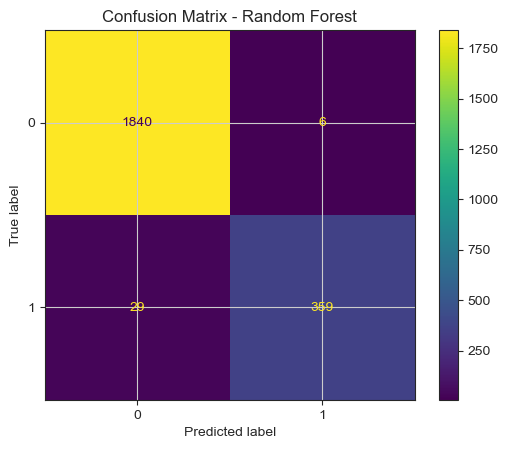

In [91]:
# Confusion Matrix Plot
ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

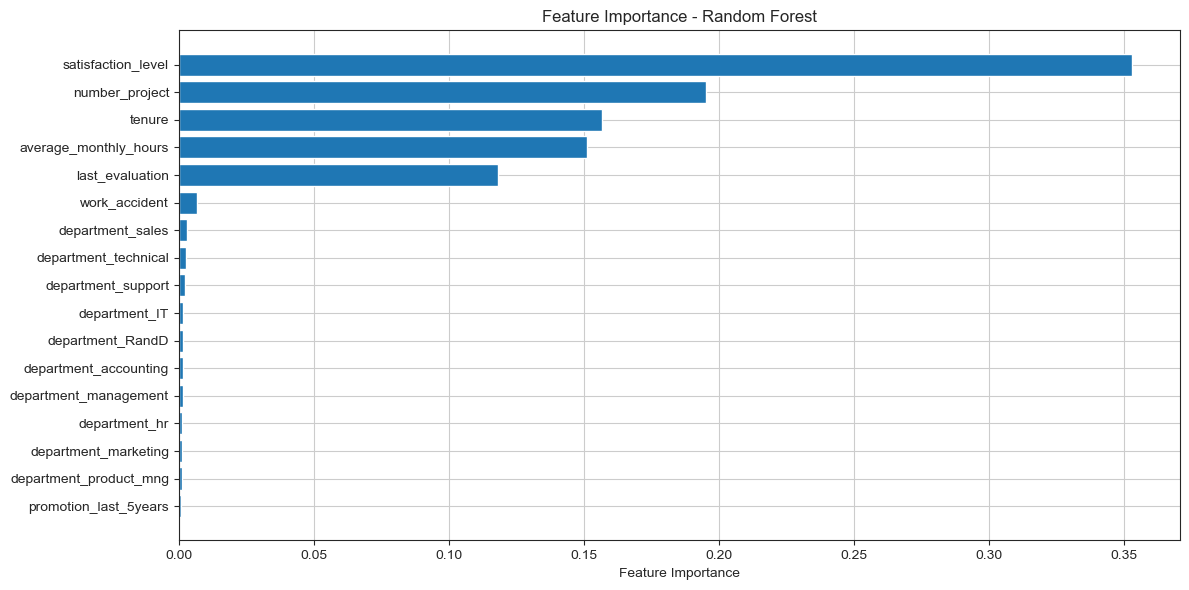

In [92]:
# 5. Extract the fitted OneHotEncoder from the pipeline
ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

# 6. Get feature names from the OneHotEncoder
ohe_feature_names = ohe.get_feature_names_out(input_features=categorical_features)

# 7. Combine numeric and categorical feature names
feature_names = list(numeric_features) + list(ohe_feature_names)

# 8. Get feature importances from the trained random forest
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# 9. Sort features by importance
indices = np.argsort(importances)[::-1]  # descending order
sorted_feature_names = np.array(feature_names)[indices]
sorted_importances = importances[indices]

# 10. Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

#### **XGBoost Classifier**

In [94]:
import xgboost as xgb

# Create a pipeline for XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(random_state=42, use_label_encoder=False))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy classification report")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1846
           1       0.97      0.93      0.95       388

    accuracy                           0.98      2234
   macro avg       0.98      0.96      0.97      2234
weighted avg       0.98      0.98      0.98      2234



C:\Users\mauth\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:39:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.98 - The XGBoost model correctly predicted the outcome for 98% of the employees in the test set. 

Macro avg: 0.98 - This high unweighted average indicates strong performance across both classes.

Weighted avg: 0.98 - This weighted average also reflects the excellent performance.

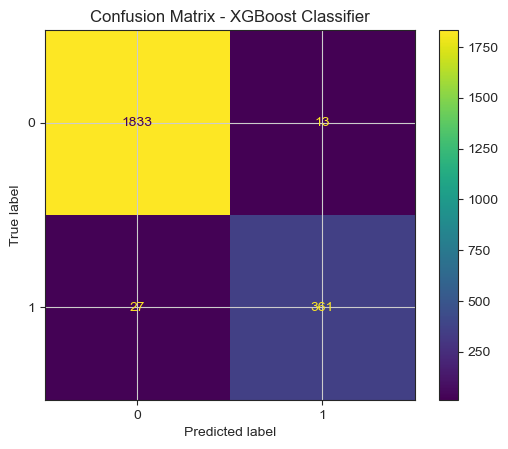

In [96]:
# Confusion Matrix Plot
ConfusionMatrixDisplay.from_estimator(xgb_pipeline, X_test, y_test)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()

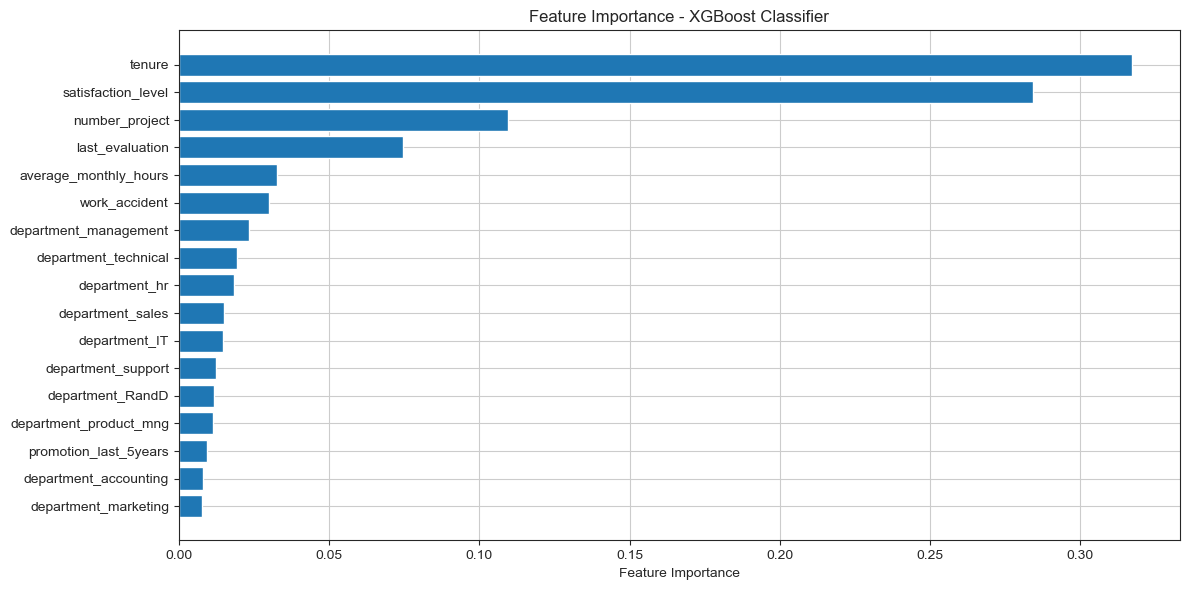

In [97]:
# 5. Extract the fitted OneHotEncoder from the pipeline
ohe = xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

# 6. Get feature names from the OneHotEncoder
ohe_feature_names = ohe.get_feature_names_out(input_features=categorical_features)

# 7. Combine numeric and categorical feature names
feature_names = list(numeric_features) + list(ohe_feature_names)

# 8. Get feature importances from the trained random forest
importances = xgb_pipeline.named_steps['classifier'].feature_importances_

# 9. Sort features by importance
indices = np.argsort(importances)[::-1]  # descending order
sorted_feature_names = np.array(feature_names)[indices]
sorted_importances = importances[indices]

# 10. Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance - XGBoost Classifier")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

**Accuracy classification report**

Interpretation and Comparison to Decision Tree and Random Forest:

The XGBoost model delivers performance that is highly competitive with the Random Forest, and both significantly outperform the single Decision Tree.

**Key Observations:**

Excellent Performance Across All Metrics: XGBoost achieves very high precision, recall, and F1-scores for both the majority ("Stayed") and minority ("Left") classes.
Slight Trade-offs Compared to Random Forest:
XGBoost has a slightly lower precision for the "Left" class (0.97 vs. 0.98). This means it has a slightly higher rate of false positives for predicting who will leave.
However, the overall accuracy and other aggregate metrics are the same (0.98).
Consistent Recall for "Left": All three models (Decision Tree, Random Forest, and XGBoost) achieve the same excellent recall of 0.93 for the "Left" class, indicating they are equally good at identifying the majority of employees who actually leave.
Superior to Decision Tree: XGBoost shows a clear improvement over the Decision Tree in terms of precision and overall accuracy, especially for the "Left" class.
Conclusion:

The XGBoost model is another excellent performer for this employee turnover prediction task, achieving results on par with the Random Forest. The choice between these two might come down to other factors such as interpretability, training time, and the specific costs associated with false positives versus false negatives in your application.

Given the slight edge in precision for the "Left" class, the Random Forest might be preferred if minimizing false alarms (predicting someone will leave when they won't) is a higher priority. However, the XGBoost model's slightly higher precision for the "Stayed" class might be beneficial in other contexts. Overall, both are strong contenders.

**Interpretation and Comparison to Tree-Based Models:**

The performance of this Linear Regression model for classification is noticeably weaker than the Decision Tree, Random Forest, and XGBoost models we saw earlier, especially for the minority class ("Left").

**In general:**

While an accuracy of 0.87 might seem reasonable in isolation, when compared to the high performance of the tree-based models (Decision Tree, Random Forest, and XGBoost) on the same task, this Linear Regression approach is clearly less effective, particularly in identifying the employees who will leave the company. For this type of classification problem, models capable of learning complex, non-linear decision boundaries are generally much more suitable.

**Feature Importance**

`satisfaction_level` consistently appears as one of the most important features across all three models, strongly influencing employee turnover prediction.

`tenure, number_project, and average_monthly_hours` are also consistently ranked as important predictors by all models.

`last_evaluation` has a moderate level of importance in all three models.

`Department-related features, work_accident, and promotion_last_5years` generally have low feature importance scores across all models, suggesting they contribute less to predicting employee turnover compared to the other numerical features.

The relative importance of `tenure` is higher in the XGBoost model compared to the Decision Tree and Random Forest.

The Linear Regression model is unique in including `overworked` as a feature and giving it high importance, and it also assigns negative importance to `satisfaction_level`.